In [1]:
# 데이터 읽기

import pandas as pd

red_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-red.csv'
white_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/winequality-white.csv'

red_wine = pd.read_csv(red_url, sep = ';')
white_wine = pd.read_csv(white_url, sep = ';')

# 와인 색상 구분 컬럼
red_wine['color'] = 1
white_wine['color'] = 0

# 두 데이터 합치기
wine = pd.concat([red_wine, white_wine])

X = wine.drop(['color'], axis=1)
y = wine['color'] # 타겟 데이터

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                   test_size = 0.2, 
                                                   random_state=13,
                                                   stratify= y
                                                   )

# 학습
wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

# 예측
y_pred_test = wine_tree.predict(X_test) 

# 성능
accuracy_score(y_test, y_pred_test)

0.9576923076923077

In [3]:
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve

print('Accuracy : ', accuracy_score(y_test, y_pred_test))
print('Recall : ', recall_score(y_test, y_pred_test))
print('Precision : ', precision_score(y_test, y_pred_test))
print('AUC score : ', roc_auc_score(y_test, y_pred_test))
print('F1 score : ', f1_score(y_test, y_pred_test))

Accuracy :  0.9576923076923077
Recall :  0.90625
Precision :  0.9206349206349206
AUC score :  0.9403698979591837
F1 score :  0.9133858267716536


In [4]:
wine_tree.predict_proba(X_test)[:, 1] # 각 데이터가 클래스에 속하는 확률

array([0.00960219, 0.00960219, 0.95848057, ..., 0.95848057, 0.95848057,
       0.00960219])

In [5]:
# roc 커브 그리기

import matplotlib.pyplot as plt

pred_proba = wine_tree.predict_proba(X_test)[:, 1] # 각 데이터가 클래스에 속하는 확률
fpr, tpr, threshold = roc_curve(y_test, pred_proba)

In [9]:
roc_curve(y_test, pred_proba)

(array([0.        , 0.01530612, 0.0255102 , 0.08673469, 1.        ]),
 array([0.      , 0.834375, 0.90625 , 0.95    , 1.      ]),
 array([1.95848057, 0.95848057, 0.72340426, 0.20430108, 0.00960219]))

In [6]:
fpr, tpr, threshold

(array([0.        , 0.01530612, 0.0255102 , 0.08673469, 1.        ]),
 array([0.      , 0.834375, 0.90625 , 0.95    , 1.      ]),
 array([1.95848057, 0.95848057, 0.72340426, 0.20430108, 0.00960219]))

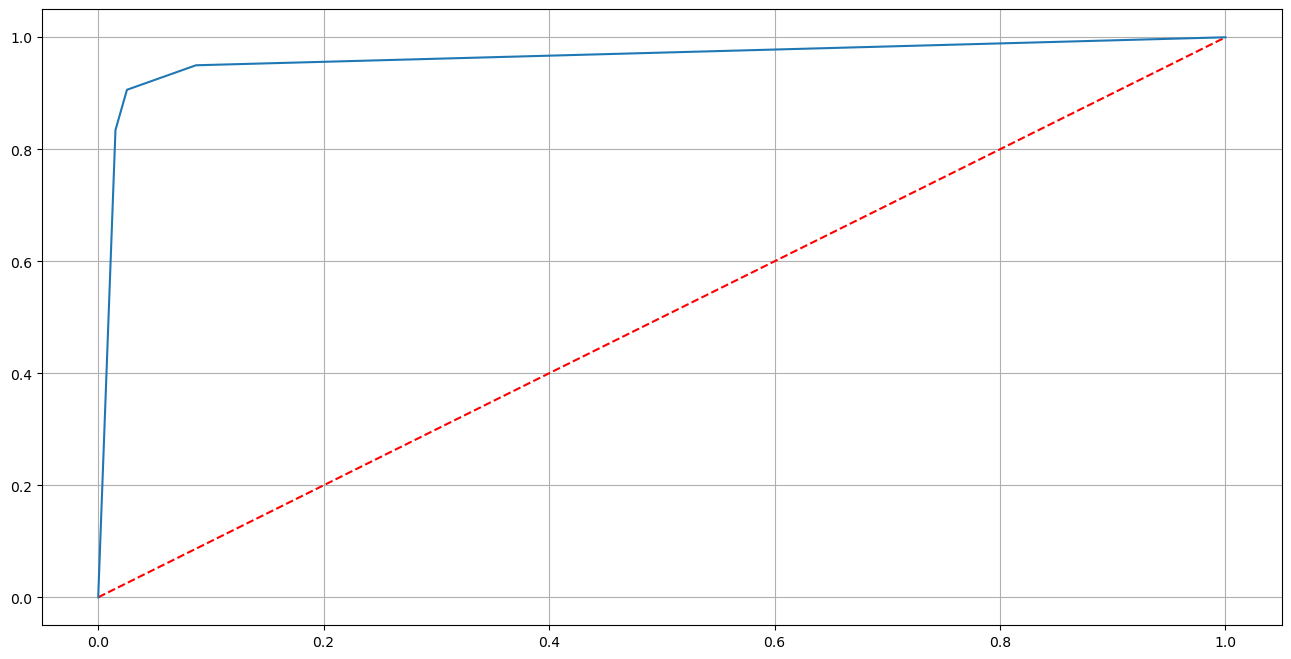

In [8]:
plt.figure(figsize = (16,8))
plt.plot([0,1],[0,1], 'r', ls = 'dashed') # 직선 그래프 
plt.plot(fpr, tpr)
plt.grid()
plt.show()

### box plot

In [10]:
samples = [1,7,9,16,36,39,45,45,46,48,51,100,101]
tmp_y = [1]*len(samples)
tmp_y

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

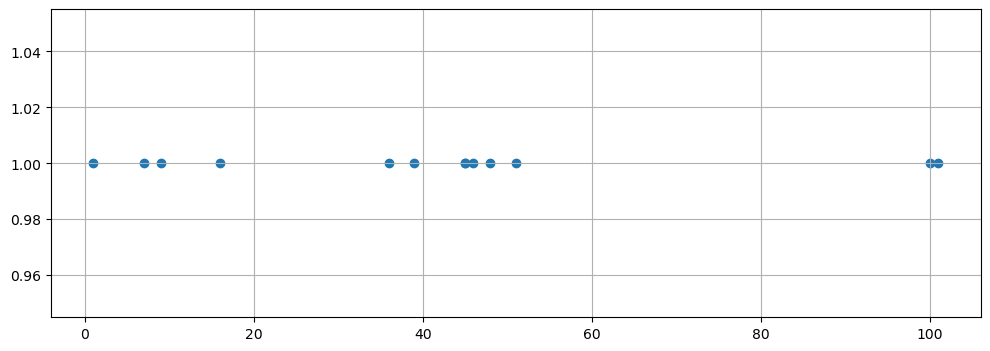

In [11]:
plt.figure(figsize=(12,4))
plt.scatter(samples, tmp_y)
plt.grid()
plt.show()

In [13]:
# 몇몇 지표를 찾는 법

import numpy as np

print('median : ', np.median(samples))
print('25% : ', np.percentile(samples, 25))
print('75% : ', np.percentile(samples, 75))
print('75% - 25% : ', np.percentile(samples, 75) - np.percentile(samples, 25))

iqr = np.percentile(samples, 75) - np.percentile(samples, 25)
print('iqr : ', iqr*1.5)

median :  45.0
25% :  16.0
75% :  48.0
75% - 25% :  32.0
iqr :  48.0


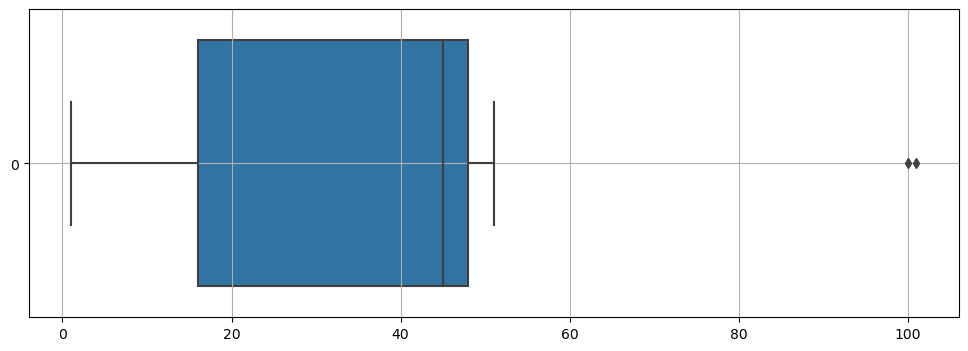

In [15]:
import seaborn as sns

plt.figure(figsize=(12,4))
sns.boxplot(samples, orient='h')
plt.grid()
plt.show()

In [22]:
samples_outlier = []
samples_no_outlier = []

data_25 = np.percentile(samples, 25)
data_75 = np.percentile(samples, 75)
iqr = data_75 - data_25

for data in samples:
    if (data < data_25 - iqr*1.5) or (data > data_75 + iqr*1.5):
        samples_outlier.append(data)
    else:
        samples_no_outlier.append(data)

samples_outlier, samples_no_outlier
        

([100, 101], [1, 7, 9, 16, 36, 39, 45, 45, 46, 48, 51])